<a href="https://colab.research.google.com/github/mihir0804/Hub_Of_Kaggle_Competition_ML_Model/blob/main/Kaggle_Competition_ML_Model_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle_Competition_ML_Model_01**

In [1]:
# Import Data Manipulation Library
import numpy as np
import pandas as pd

# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import Filter warning libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(message)s - %(levelname)s',
                    force = True)

# Import Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
# Importing Dataset Using Pandas Function
df = pd.read_csv('/content/train.csv')

# Suffle data set into 100%
df.sample(frac = 1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
587,588,85,RL,74.0,8740,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,137000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
599,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000
268,269,30,RM,71.0,6900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,120500
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,374,20,RL,79.0,10634,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,123000
907,908,50,RL,86.0,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,250000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
458,459,70,RM,NaN,5100,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,161000


In [4]:
# Checking Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking Null Values Satts
ndata = df.isnull().sum() / len(df) * 100
ndata[ndata>0].sort_values(ascending= False)

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


In [6]:
# Data Cleaning
df = df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType',
                        'FireplaceQu','LotFrontage'],axis = 1)

In [10]:
# Segregate Numerical columns and Categorical columns
numerical_col = df.select_dtypes(exclude = 'object')
categorical_col = df.select_dtypes(include = 'object')

In [11]:
from sklearn.impute import SimpleImputer

# Imputing Numerical Columns
num_col = SimpleImputer(strategy = 'median')
for i in numerical_col.columns:
  df[i] = num_col.fit_transform(df[[i]])

# ravel() : this will helps to convert 2D to 1D : This function is same as flatten()

# Imputing Categorical Columns
cat_col = SimpleImputer(strategy = 'most_frequent')
for i in categorical_col.columns:
  df[i] = cat_col.fit_transform(df[[i]]).ravel()

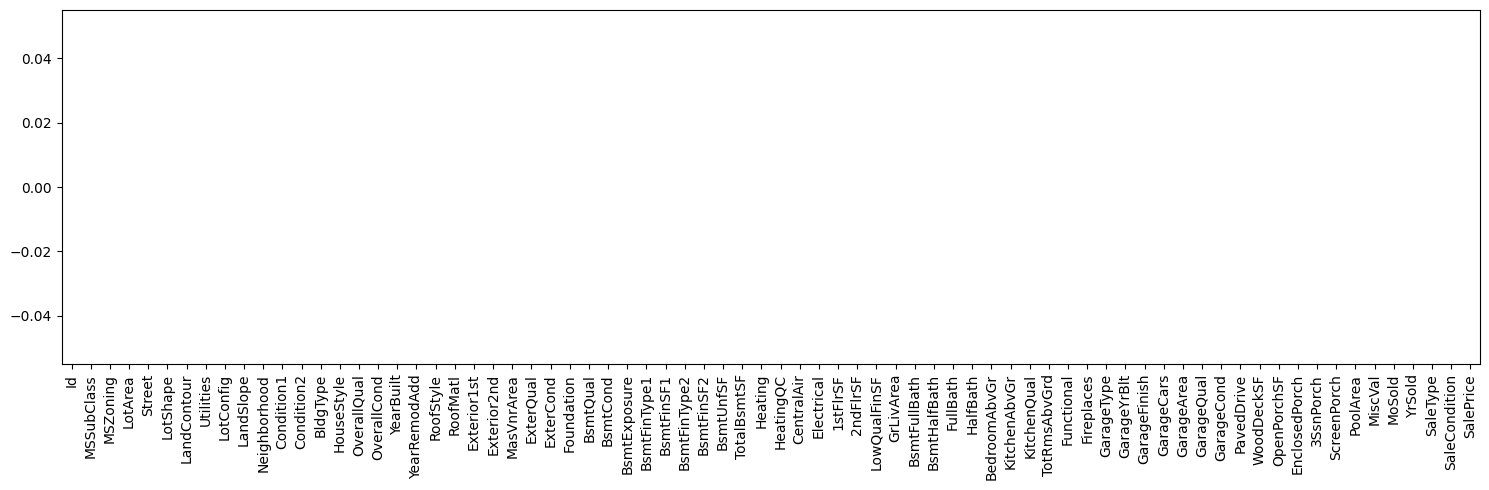

In [12]:
plt.figure(figsize = (15,5))
df.isnull().sum().plot(kind = 'bar')
plt.tight_layout()
plt.show()

In [13]:
# Using LabelEncoder in order to convert Categorical columns to Numerical Columns

le = LabelEncoder()

for i in categorical_col.columns:
  df[i] = le.fit_transform(df[i])

In [14]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3,8450.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,2.0,20.0,3,9600.0,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,3.0,60.0,3,11250.0,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,4.0,70.0,3,9550.0,1,0,3,0,0,0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,5.0,60.0,3,14260.0,1,0,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3,7917.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8,4,175000.0
1456,1457.0,20.0,3,13175.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8,4,210000.0
1457,1458.0,70.0,3,9042.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8,4,266500.0
1458,1459.0,20.0,3,9717.0,1,3,3,0,4,0,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8,4,142125.0


In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# EDA : Univariate Analysis
from collections import OrderedDict

stats = []

for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Count':df[i].count(),
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
      'Standard Deviation':df[i].std(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurtosis()
      })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report

,Feature,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Id,1460,1.0,1460.0,730.500000,730.5,365.75,1095.25,729.50,421.610009,0.000000,-1.200000
1,MSSubClass,1460,20.0,190.0,56.897260,50.0,20.00,70.00,50.00,42.300571,1.407657,1.580188
2,MSZoning,1460,0.0,4.0,3.028767,3.0,3.00,3.00,0.00,0.632017,-1.735395,6.287175
3,LotArea,1460,1300.0,215245.0,10516.828082,9478.5,7553.50,11601.50,4048.00,9981.264932,12.207688,203.243271
4,Street,1460,0.0,1.0,0.995890,1.0,1.00,1.00,0.00,0.063996,-15.518770,239.159822
5,LotShape,1460,0.0,3.0,1.942466,3.0,0.00,3.00,3.00,1.409156,-0.610175,-1.595908
6,LandContour,1460,0.0,3.0,2.777397,3.0,3.00,3.00,0.00,0.707666,-3.162499,8.695631
7,Utilities,1460,0.0,1.0,0.000685,0.0,0.00,0.00,0.00,0.026171,38.209946,1460.000000
8,LotConfig,1460,0.0,4.0,3.019178,4.0,2.00,4.00,2.00,1.622634,-1.135632,-0.579872
9,LandSlope,1460,0.0,2.0,0.062329,0.0,0.00,0.00,0.00,0.276232,4.813682,24.597605


In [16]:
report[report['IQR'] == 0]['Feature'].values

array(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
       'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond',
       'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition'], dtype=object)

In [17]:
# Data Cleaning

df.drop(columns = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
       'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond',
       'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition'], inplace = True)

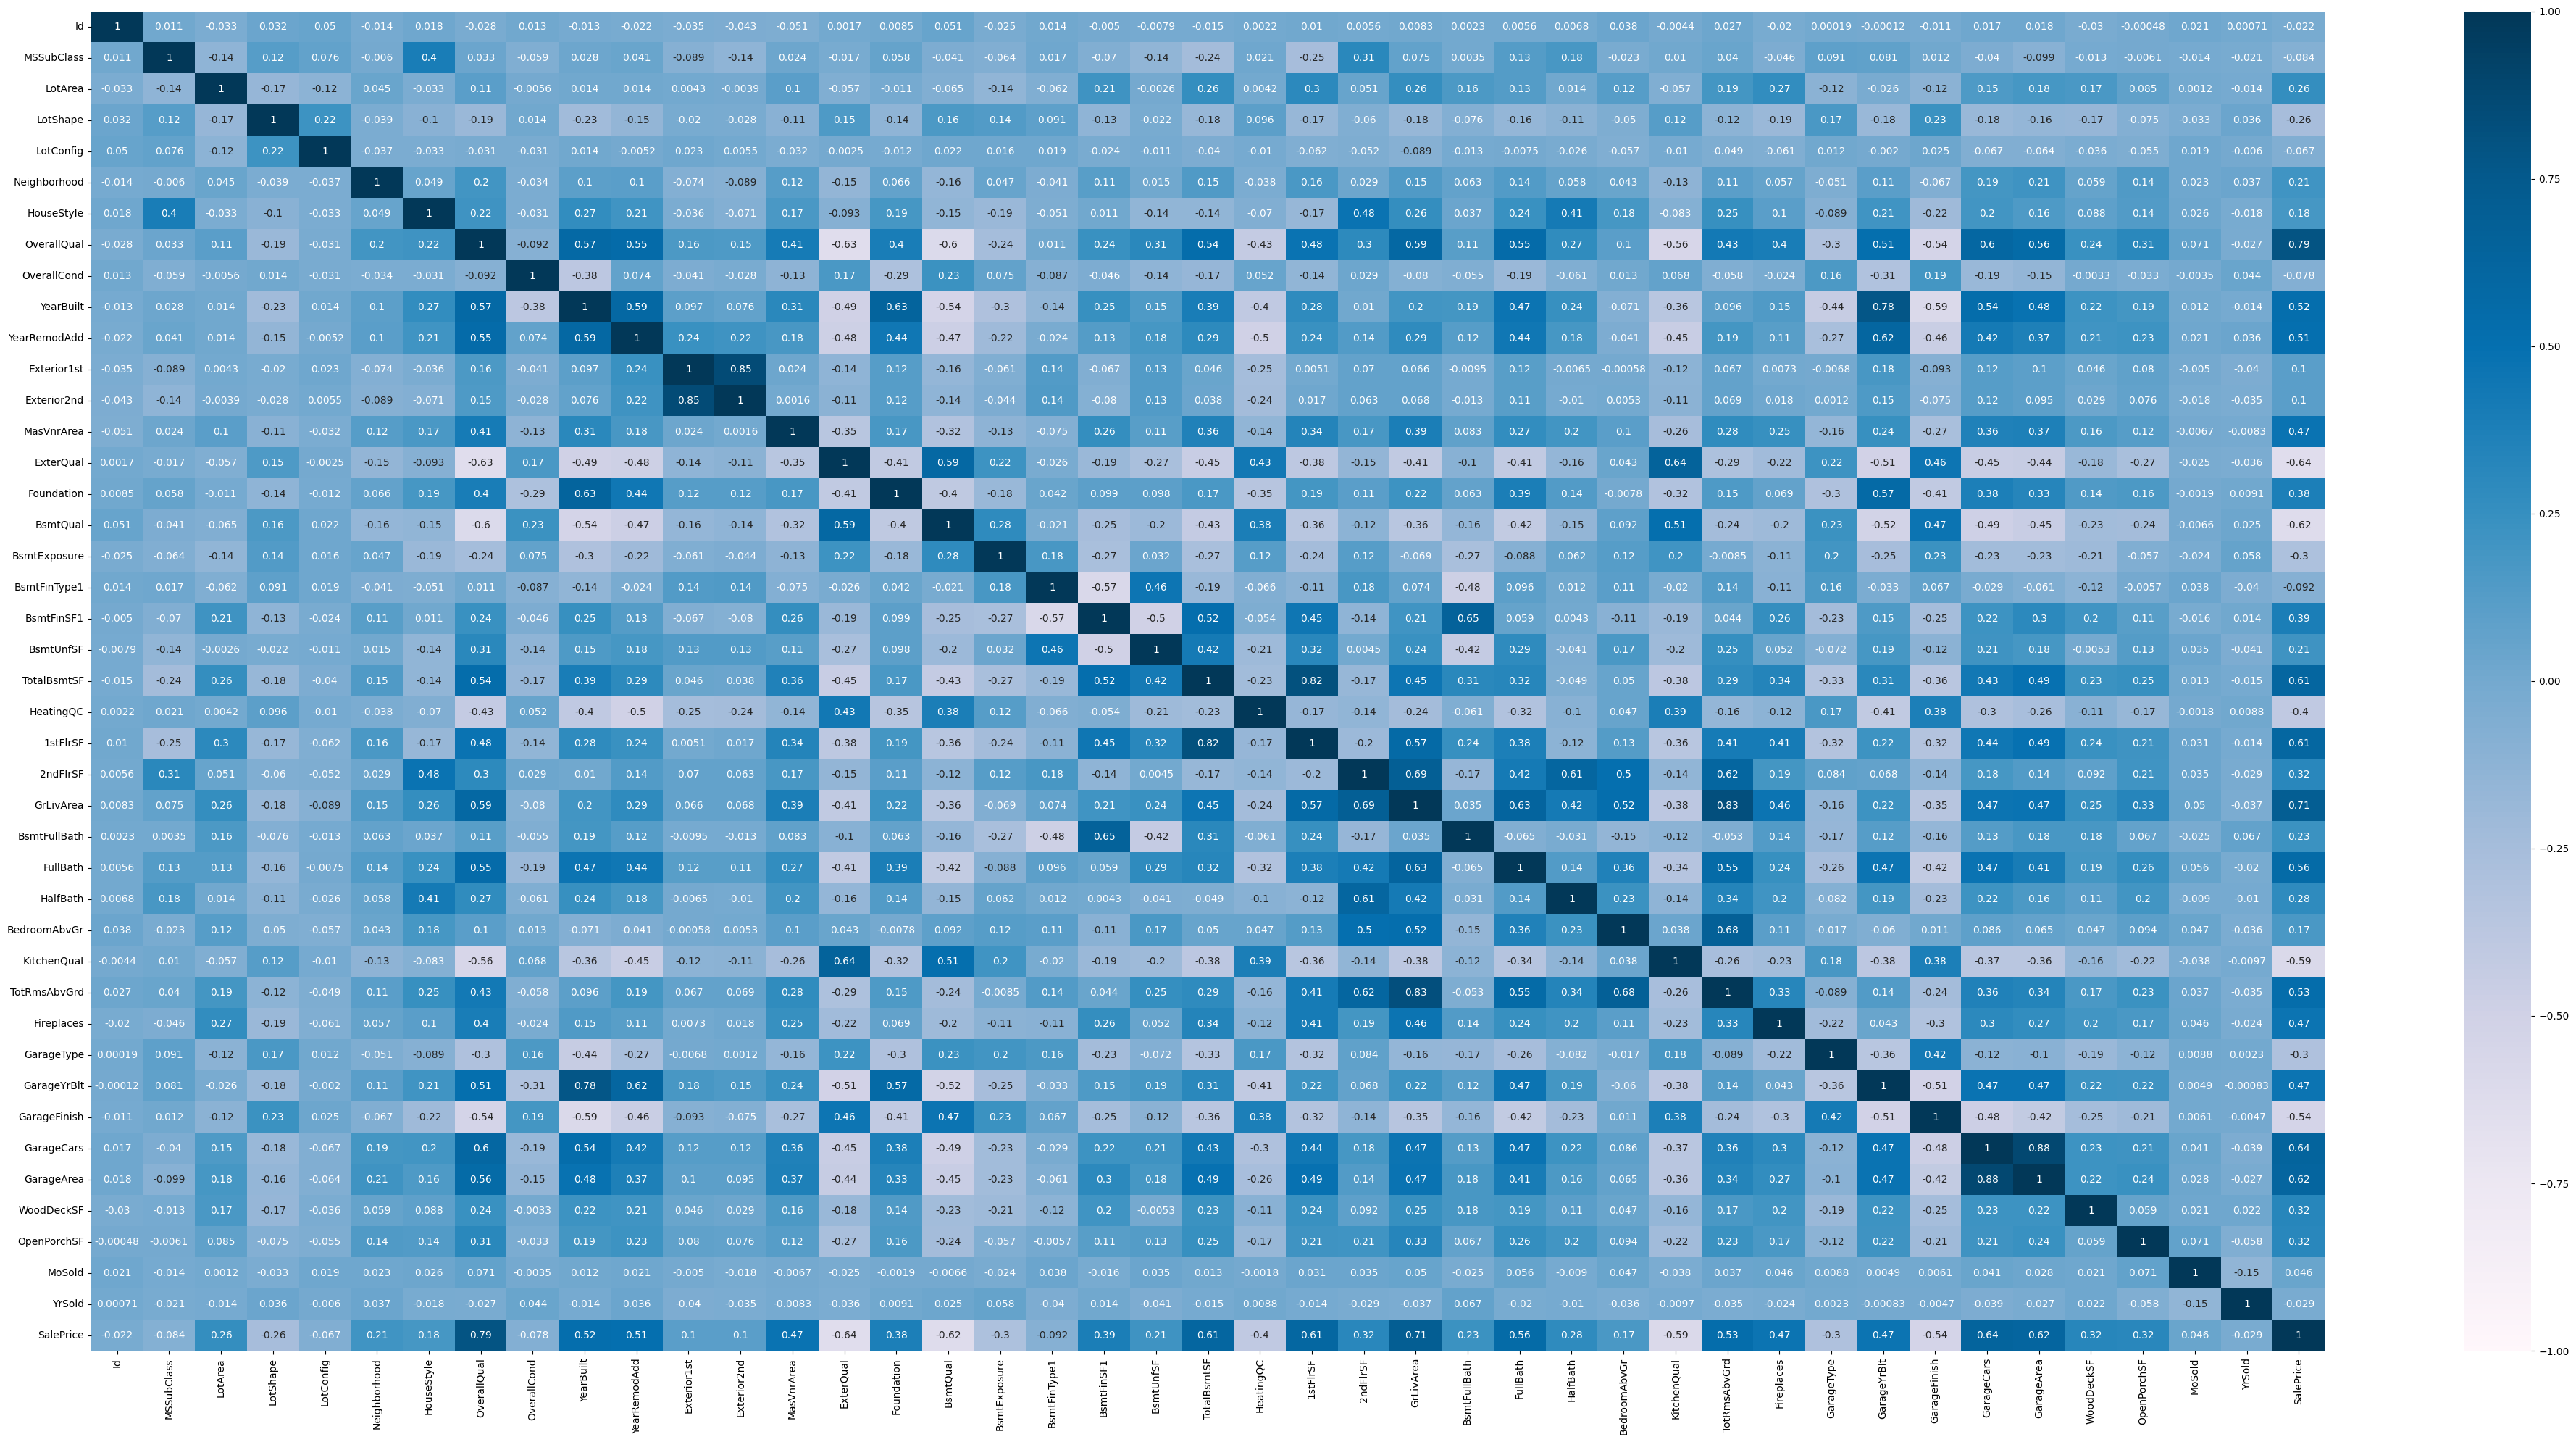

In [20]:
# Heatmap
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(),annot= True,vmin = -1,vmax = 1,center = 0,cmap = 'PuBu')
plt.tight_layout()
plt.show()

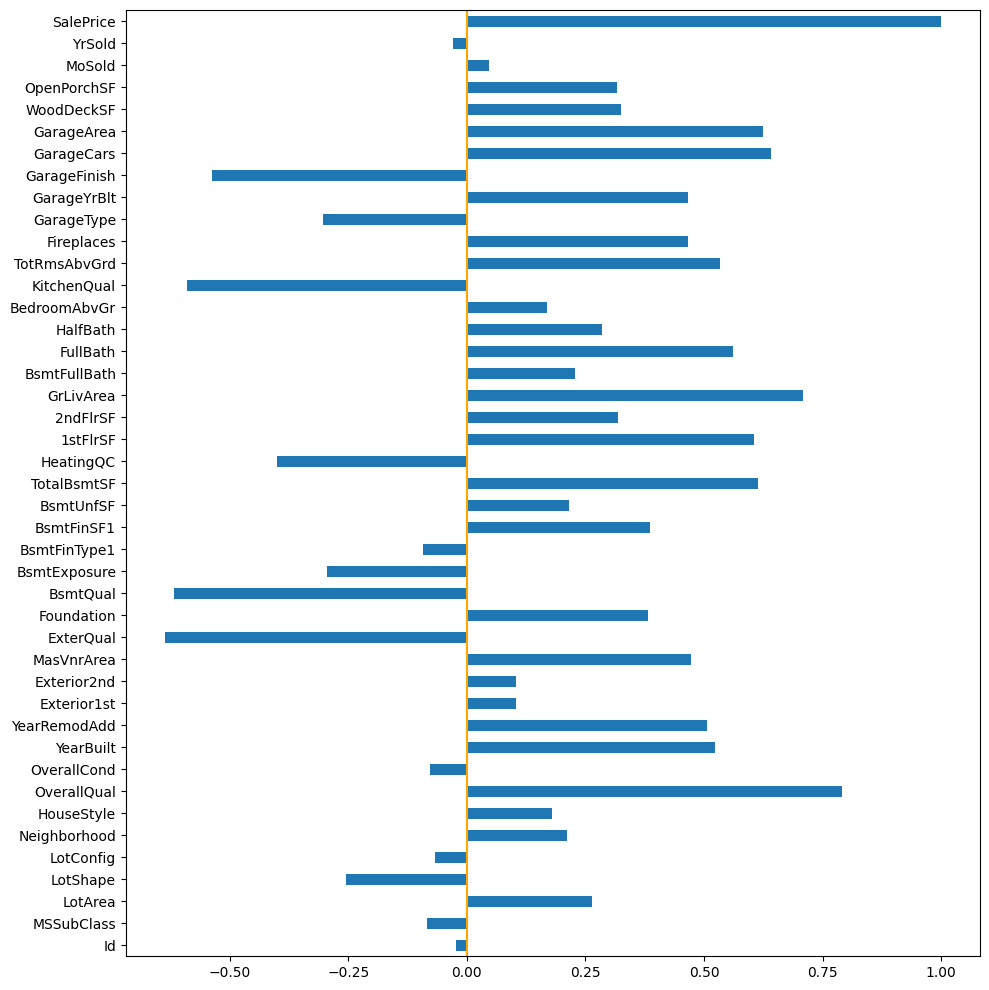

In [23]:
plt.figure(figsize = (10,10))
df.corr()['SalePrice'].plot(kind = 'barh')
plt.axvline(0,color = 'orange')
plt.tight_layout()
plt.show()

In [24]:
X = df.drop(columns = ['Id','SalePrice'],axis = 1)
y = df['SalePrice']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [26]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

r2_score(y_test,y_pred_rf)

0.9013839614443725

In [29]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
r2_score(y_test,y_pred_xgb)

0.8964300100768124

In [30]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [31]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,y_train)
y_pred_cat = cat.predict(X_test)
r2_score(y_test,y_pred_cat)

Learning rate set to 0.041084
0:	learn: 75611.8178551	total: 61.1ms	remaining: 1m 1s
1:	learn: 73754.0404658	total: 69.5ms	remaining: 34.7s
2:	learn: 71862.3353361	total: 78.6ms	remaining: 26.1s
3:	learn: 70099.3678936	total: 89.1ms	remaining: 22.2s
4:	learn: 68342.7455865	total: 97.8ms	remaining: 19.5s
5:	learn: 66729.4637387	total: 108ms	remaining: 17.9s
6:	learn: 65257.1026384	total: 117ms	remaining: 16.6s
7:	learn: 63623.7967364	total: 127ms	remaining: 15.8s
8:	learn: 62146.7165294	total: 142ms	remaining: 15.6s
9:	learn: 60808.4960242	total: 151ms	remaining: 14.9s
10:	learn: 59492.6097615	total: 161ms	remaining: 14.5s
11:	learn: 58113.8646515	total: 171ms	remaining: 14.1s
12:	learn: 56980.7380062	total: 181ms	remaining: 13.7s
13:	learn: 55857.8750328	total: 191ms	remaining: 13.4s
14:	learn: 54700.5416378	total: 204ms	remaining: 13.4s
15:	learn: 53549.8887555	total: 214ms	remaining: 13.2s
16:	learn: 52399.8129041	total: 252ms	remaining: 14.6s
17:	learn: 51446.7604502	total: 269ms	re

0.9209854220412633